<a href="https://colab.research.google.com/github/jamagiwa/math_visualize/blob/main/probability_theory/characteristic_function/convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 特性関数

## そもそもなぜ特性関数がE(e^izx)の形なのか

- 畳み込みによる正規分布の表現

一様分布をグラフにしてみる

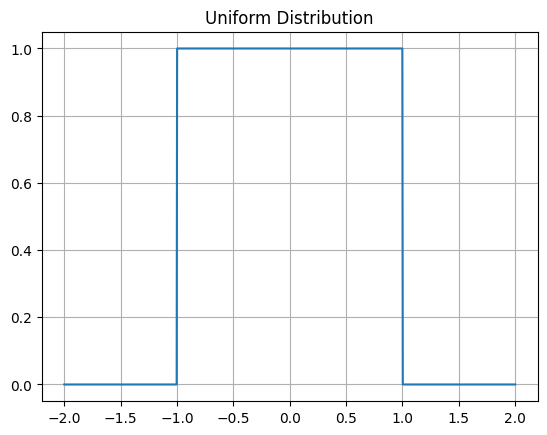

In [38]:
#一様分布
import numpy as np
import matplotlib.pyplot as plt

#グラフの描画
#x軸の範囲
#[a, b]を少し広げた範囲までx軸を描画
#範囲内を1000個の等間隔で分ける
x = np.linspace(-2, 2, 1000)

#y軸の値の計算
#条件に基づいて数を返す関数
y = np.where(np.abs(x) <=1, 1, 0)

#plotの描画
plt.plot(x, y, label = "Uniform distribution")
plt.title("Uniform Distribution")
plt.grid(True)
plt.show()

- 一様分布同士をを畳み込み



畳み込み積分とは？　(f*g)(t) = ∫f(τ)g(t - τ)dτ

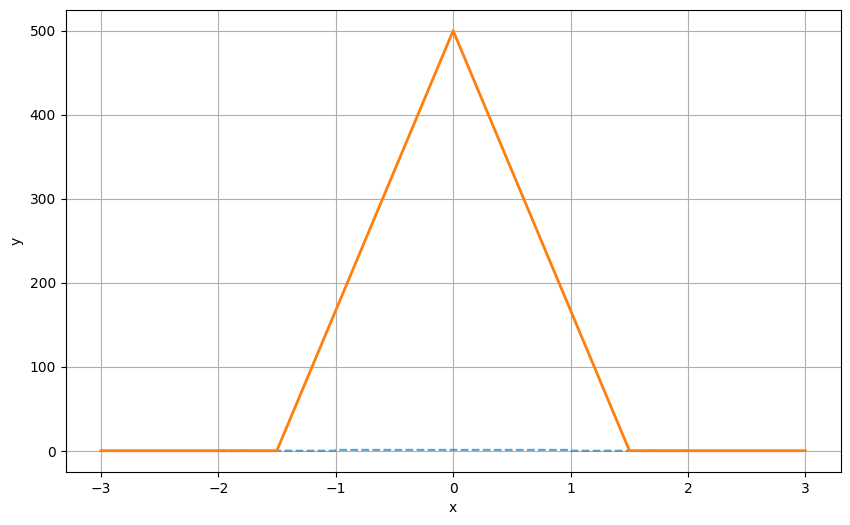

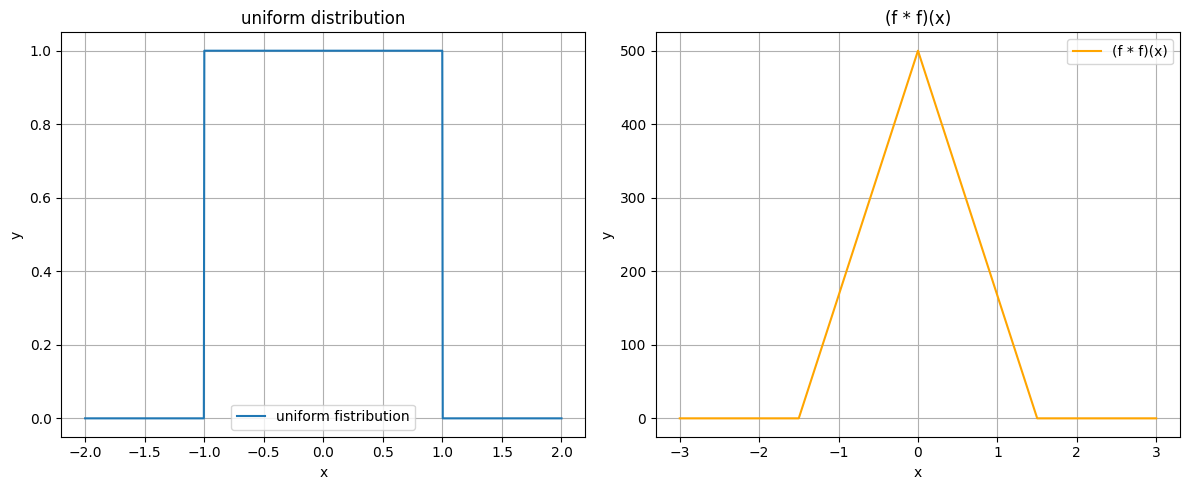

In [39]:
#一様分布同士のの畳み込み
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

#一様分布の定義
x = np.linspace(-2, 2, 1000)
#np.abs...絶対値, xの絶対値が0.5以上ならy = 1.0でそれ以外は0
uniform_dist = np.where(np.abs(x) <=1, 1.0, 0)

#畳み込み積分の実行
conv_result = convolve(uniform_dist, uniform_dist, mode = "full")

#畳み込み後のx軸
conv_x = np.linspace(-3.0, 3.0,  len(conv_result))

#グラフの描画
plt.figure(figsize = (10, 6))

#元の一様分布
plt.plot(x, uniform_dist, label = "uniform_dist", linestyle = "--", alpha = 0.7)

#畳み込み結果
plt.plot(conv_x, conv_result, label = "(f*f)(x)", linewidth = 2)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

#一様分布と畳み込み後を別々に
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
#左側, 一様分布
axes[0].plot(x, uniform_dist, label ="uniform fistribution")
axes[0].set_title("uniform distribution")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].grid(True)
axes[0].legend()

#右側, 畳み込み後
axes[1].plot(conv_x, conv_result, label='(f * f)(x)', color='orange')
axes[1].set_title('(f * f)(x)')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].grid(True)
axes[1].legend()

#出力
plt.tight_layout()
plt.show()


[2, -2]を1000個に分割している, [-1, 1]は500この点が存在するため、f*fは500になる。


fを確率測度、即ち0≦f(x)≦1にすれば良い


- 積分値をAreaで正規化　0<=f<=1

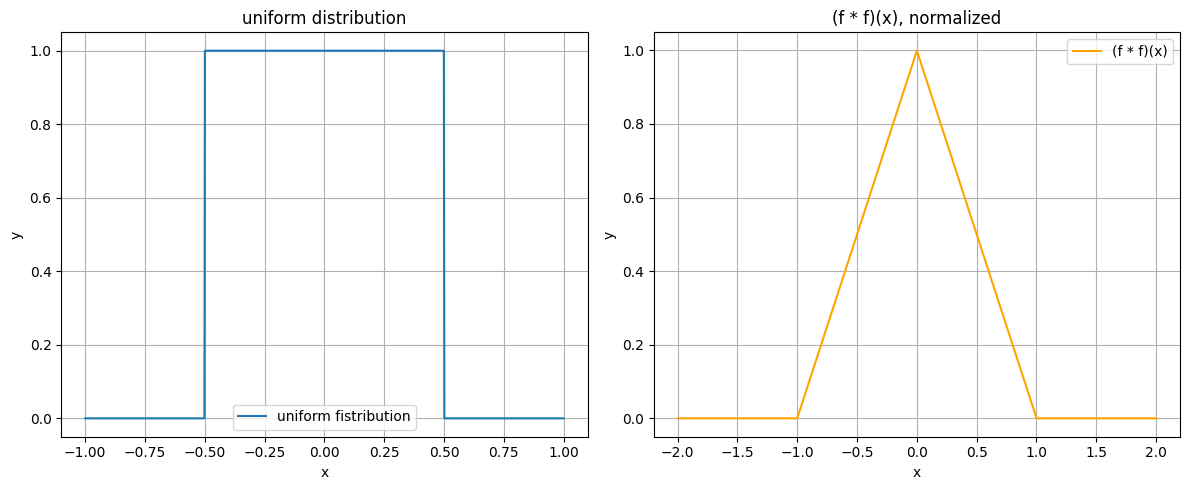

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

#一様分布の定義
x = np.linspace(-1, 1, 1000)
unform_dist = np.where(np.abs(x) <= 1, 1, 0)

#畳み込み
conv_result = convolve(uniform_dist, uniform_dist, mode = "full")
conv_x = np.linspace(-2, 2, len(conv_result))

#正規化
#畳み込み積分の値を算出
area  = np.trapezoid(conv_result,  conv_x)#np.trapz(y, x)でAreaを算出
#正規化
conv_result_normalized = conv_result /  area


#一様分布と畳み込み後を別々に
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
#左側, 一様分布
axes[0].plot(x, uniform_dist, label ="uniform fistribution")
axes[0].set_title("uniform distribution")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].grid(True)
axes[0].legend()

#右側, 畳み込み後
axes[1].plot(conv_x, conv_result_normalized, label='(f * f)(x)', color='orange')
axes[1].set_title('(f * f)(x), normalized')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].grid(True)
axes[1].legend()

#出力
plt.tight_layout()
plt.show()

conv_x = np.linspace(-2, 2, len(conv_result))

畳み込みをする定義域は、一様分布関数の定義域に注意。重なっていない状態を考慮。

- 同じ形のテント関数の畳み込み

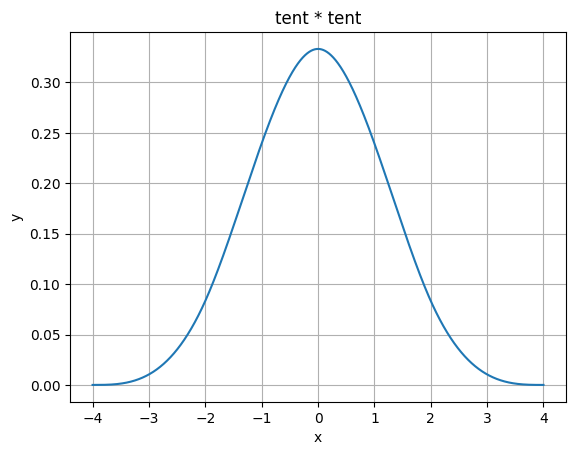

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

#一様分布
x_uniform = np.linspace(-1, 1, 10000)
uniform_dist = np.where(np.abs(x_uniform) <= 1, 1, 0 )

#一様分布の畳み込み box -> tent
tent_dist = convolve(uniform_dist,  uniform_dist, mode = "full")
x_tent = np.linspace(-2, 2, len(tent_dist))

#tentの畳み込み　tent -> smooth1
smooth1_dist = convolve(tent_dist, tent_dist, mode = "full")
x_smooth1  = np.linspace(-4, 4, len(smooth1_dist))

#正規化
area = np.trapezoid(smooth1_dist, x_smooth1)
smooth1_normalized = smooth1_dist / area

#グラフの描画
plt.plot(x_smooth1, smooth1_normalized, label = "tent * tent")
plt.title("tent * tent")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

同じ形のテント関数は正規分布の様な形状になる。

- 違う形の一様分布を畳み込みしてみる

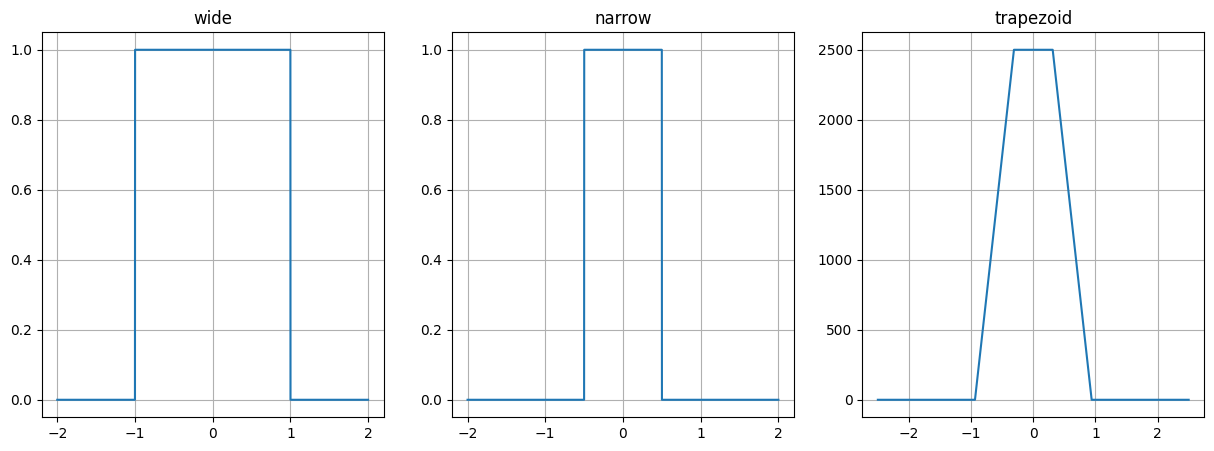

In [42]:
# 幅の異なる一様分布を定義
x = np.linspace(-2, 2, 10000)
uniform_wide = np.where(np.abs(x) <= 1, 1, 0)
uniform_narrow = np.where(np.abs(x) <= 0.5, 1, 0)

#畳み込み
trapezoid_dist = convolve(uniform_wide, uniform_narrow, mode = "full")
x_trapezoid = np.linspace(-2.5, 2.5, len(trapezoid_dist))

#グラフ描画
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

axes[0].plot(x, uniform_wide, label = "wide")
axes[0].set_title("wide")
axes[0].grid(True)

axes[1].plot(x, uniform_narrow, label = "narrow")
axes[1].set_title("narrow")
axes[1].grid(True)

axes[2].plot(x_trapezoid, trapezoid_dist, label = "trapezoid")
axes[2].set_title("trapezoid")
axes[2].grid(True)

台形の頂点は、一方が完全に飲み込まれている状態